Linear Regression and Gradient Descent: From Prediction to Classification

This notebook demonstrates how to apply Linear Regression using both Ordinary Least Squares (OLS) and Gradient Descent. It begins with predicting car fuel efficiency (MPG) and transitions into a binary classification task on housing prices by thresholding the target variable. The implementation includes:

Data preprocessing and visualization

Deriving optimal weights via OLS and gradient descent

Cost function analysis and convergence plotting

Converting regression to classification

Model evaluation using accuracy and visual comparison of predictions

This walkthrough offers a hands-on understanding of how linear models behave in both regression and classification settings.

### 🚗 Loading the Auto MPG Dataset

We begin by importing the **Auto MPG** dataset, which contains information about various car models from the 1970s and 1980s. The dataset includes features such as:

- `mpg` — miles per gallon (fuel efficiency)
- `cylinders` — number of cylinders
- `displacement` — engine displacement
- `horsepower` — engine horsepower
- `weight` — vehicle weight
- `acceleration` — acceleration (0–60 mph time)
- `model year` — year of manufacture
- `origin` — region where the car was produced (e.g., USA, Europe, Japan)
- `car name` — name of the car

We load the dataset using `pandas.read_csv()` for further analysis and model building.


In [23]:
# Read Auto MPG data
import pandas as pd
import numpy as np

data = pd.read_csv('/auto-mpg.data.csv')

### 🧾 Selecting Features and Target Variable

We now separate the dataset into:

- `y` — the target variable, which is **miles per gallon (`mpg`)**
- `X` — the input features used for prediction

To simplify the analysis:
1. We drop the `mpg` column from `X` since it's the label.
2. We also remove the `carname` column, which is textual and not useful for numerical modeling.
3. From the remaining features, we select only the **third column** (index 2) — for example, this could be `horsepower` or `weight`, depending on column order.
4. Finally, we add a column of **ones** to `X` as the **intercept term**, preparing it for linear regression.

This reduced version of `X` will allow us to build a simple linear regression model with one feature plus a bias term.


In [24]:
# make two variables - X and y
y = data.iloc[:, 0]  # the first columne is for class label
X = data.drop('mpg', axis=1)
X = X.drop('carname', axis=1)
n, p = X.shape # number of samples and features
X = X.iloc[:, 2] # use only the second feature
X = pd.DataFrame(np.c_[np.ones(n), X])

### 🔍 Scatter Plot of Displacement vs MPG

This scatter plot shows the relationship between **displacement** (a measure of engine size) and **miles per gallon (MPG)**.

- Each point represents a car in the dataset.
- The **x-axis** shows the engine displacement.
- The **y-axis** shows the fuel efficiency in MPG.

From the plot, we observe a **negative correlation**: as displacement increases, MPG tends to decrease. This indicates that cars with larger engines generally have lower fuel efficiency — an intuitive and expected trend in automotive data.


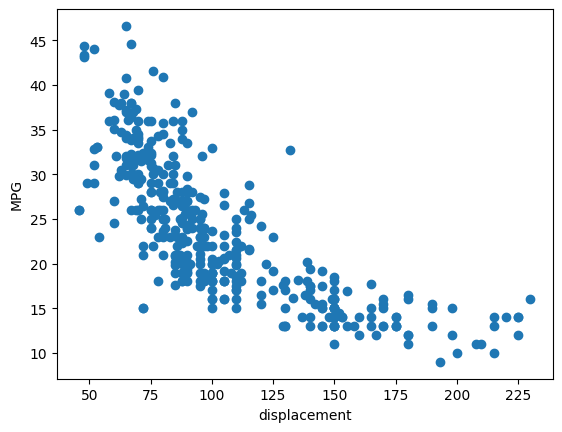

In [25]:
# plot the data
import matplotlib.pyplot as plt
plt.plot(X.iloc[:, 1], y, 'o')
plt.xlabel("displacement")
plt.ylabel("MPG")
plt.show()

### 🧮 Simple Linear Regression using Matrix Inversion

In this step, we implement linear regression from scratch using the **normal equation**:

\[
\mathbf{b} = (X^\top X)^{-1} X^\top y
\]

- The function `SolverLinearRegression(X, y)` calculates the optimal coefficients **b** (intercept and slope) for the best-fitting line.
- The `abline` function then plots this regression line over the scatter plot of Displacement vs MPG.

The result is a dashed orange line showing the model's prediction trend — a **downward slope**, confirming a **negative relationship** between displacement and fuel efficiency (MPG).


[39.96415445 -0.15801635]


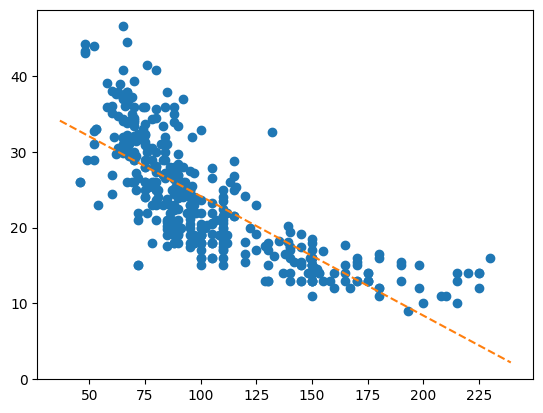

In [26]:
def SolverLinearRegression(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

b = SolverLinearRegression(X, y)
print(b)

plt.plot(X.iloc[:, 1], y, 'o')
abline(b[1], b[0])
plt.show()

### 📉 Visualizing the Cost Function in Linear Regression

This section defines and plots the **Ordinary Least Squares (OLS)** cost function:

\[
\text{Cost}(b) = \sum (y - Xb)^2
\]

- We vary the slope coefficient \( b \) across a range and compute the total squared error (cost) for each.
- The resulting U-shaped curve helps visualize how the cost changes with different slope values.
- The **minimum point** on this curve corresponds to the **optimal coefficient** that minimizes the prediction error — a core principle of linear regression.


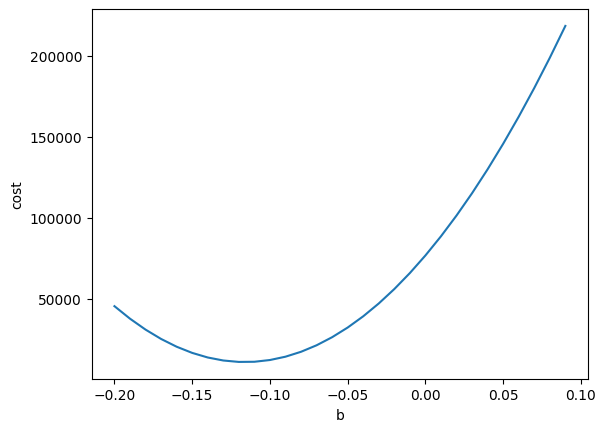

-0.12

In [27]:
# cost function using OLS
def cost(X, y, b):
    return np.sum((np.dot(X, b) - np.array(y))**2)

# check costs with several coefficients
bs = [p/100 for p in range(-20, 10)]
y_pred = [cost(X, y, [35, i]) for i in bs]

#bs = [p for p in range(0, 100)]
#y_pred = [cost(X, y, [i, -0.06]) for i in bs]

plt.plot(bs, y_pred)
plt.xlabel("b")
plt.ylabel("cost")
plt.show()
bs[np.argmin(y_pred)]

### 🔁 Linear Regression using Gradient Descent

In this section, we implement linear regression using **gradient descent**:

- The function `GD_LR(X, y, b)` computes the gradient of the cost function with respect to the parameters \( b \).
- Starting with an initial guess for \( b \), we iteratively update it in the opposite direction of the gradient to reduce error.
- The **learning rate** controls how large each step is.
- The plot shows how the cost function decreases with each iteration, indicating convergence of the algorithm.

This is a core idea behind many machine learning models — optimizing a loss function via gradient-based methods.


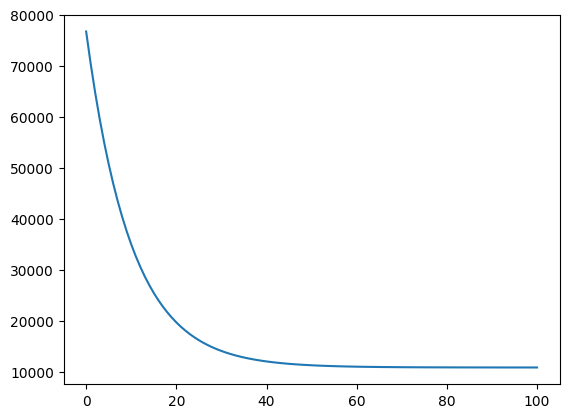

[34.99926006 -0.11523427]


In [28]:
def GD_LR(X, y, b):
    return -np.dot(X.transpose(), y) + np.dot(np.dot(X.transpose(), X), b)


# solve by gradient descent
b_est = [35.0, 0.0]  # initial value
learning_rate = 1e-8 # learning rate
bs = [b_est]
costs = [cost(X, y, b_est)]
for i in range(0, 100):
    b_est = b_est - learning_rate * GD_LR(X, y, b_est)
    b_cost = cost(X, y, b_est)
    bs.append(b_est)
    costs.append(b_cost)

# check convergence
plt.plot(costs)
plt.show()
print(b_est)

b_opt = b_est

### ⚙️ Gradient Descent with Normalized Data

To improve the performance of gradient descent, we normalize the feature and response variables using `sklearn.preprocessing.scale()`. This transformation standardizes the values to have mean 0 and standard deviation 1.

- Normalization makes convergence faster and more stable.
- After scaling, we perform linear regression using the closed-form **Ordinary Least Squares (OLS)** solution.
- The result is a straight line fitted to the normalized data, showing the trend more clearly without scale-related bias.


[-0.80420282]


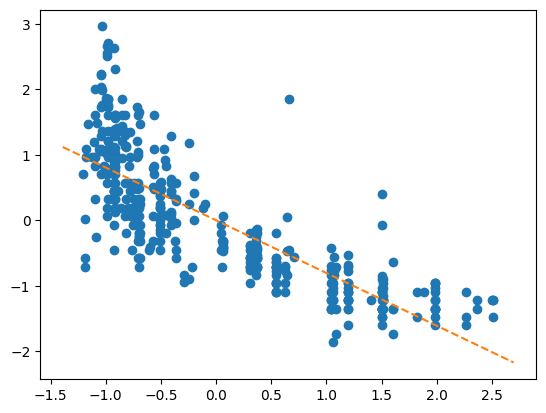

In [29]:
# Gradient Descent by normalizing data
from sklearn import preprocessing
X_nor = pd.DataFrame(preprocessing.scale(data.iloc[:, 2]))
y_nor = preprocessing.scale(y)

plt.plot(X_nor, y_nor, 'o')

# solution by OLS
b_opt = SolverLinearRegression(X_nor, y_nor)
print(b_opt)

abline(b_opt, 0)
plt.show()

### 🔁 Gradient Descent Optimization on Normalized Data

This section performs **gradient descent** on normalized data to minimize the **mean squared error** between predicted and actual values.

- We initialize the weight coefficient (`b_est`) and iterate 100 times.
- At each step, we update the weight using the gradient and record both the cost and coefficient.
- The first plot shows the **convergence of the cost function**, confirming that the optimization is progressing.
- The second plot shows how the **coefficient values affect the cost**, illustrating the optimization landscape.

This approach complements the OLS solution and is useful when analytical solutions are infeasible.


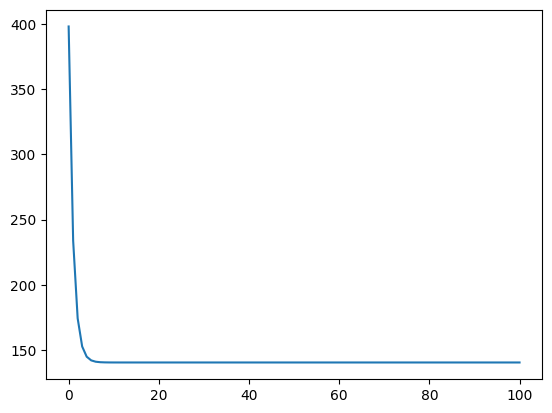

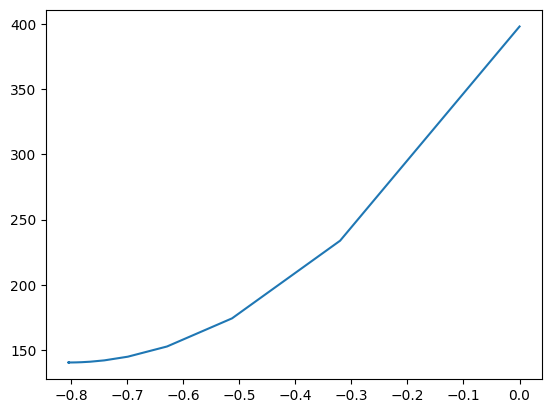

array([-0.80420282])

In [30]:
b_est = [0.0]
learning_rate = 1e-3
bs = [b_est]
costs = [cost(X_nor, y_nor, b_est)]
for i in range(0, 100):
    b_est = b_est - learning_rate * GD_LR(X_nor, y_nor, b_est)
    b_cost = cost(X_nor, y_nor, b_est)
    bs.append(b_est)
    costs.append(b_cost)

# check convergence
plt.plot(costs)
plt.show()

plt.plot(bs, costs)
plt.show()

b_opt = b_est
b_opt

### 📉 Plotting Prediction Errors

This plot visualizes the **residuals**—the differences between the predicted and actual values after gradient descent optimization.

- Residuals = `prediction - actual`
- Ideally, residuals should be randomly scattered around zero, indicating no clear bias in the predictions.
- Patterns in this plot might indicate underfitting, non-linearity, or heteroscedasticity.

This diagnostic step helps assess model fit and potential improvements.


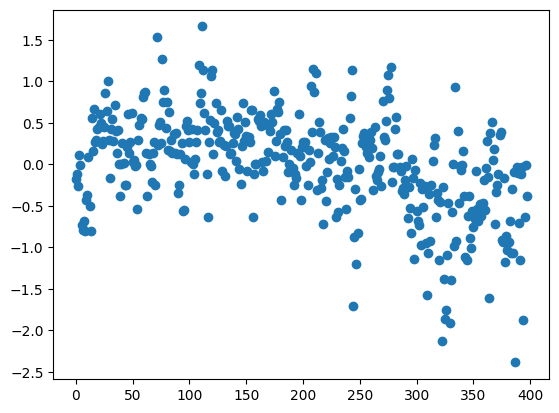

In [31]:
# errors
plt.plot(np.dot(X_nor, b_opt) - np.array(y_nor), 'o')
plt.show()

### 📊 Final Model Evaluation with RMSE

This block performs **final evaluation of the linear regression model** using the full dataset.

- We compute predictions and plot the **residuals** (errors).
- The **Root Mean Square Error (RMSE)** is calculated to measure the model’s average prediction error.
- RMSE is a standard metric that indicates the **typical magnitude of prediction error**.

A lower RMSE value suggests a better fit.


[-1.50890112e+01 -2.51212954e-01  6.86937913e-03  3.10119902e-03
 -6.99127743e-03  9.46663097e-02  7.58000167e-01]


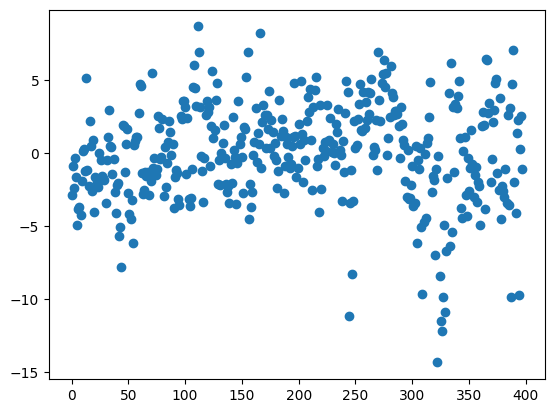

np.float64(3.41413323985593)

In [32]:
y = data.iloc[:, 0]  # the first columne is for class label
X = data.drop('mpg', axis=1)
X = X.drop('carname', axis=1)
n, p = X.shape # number of samples and features
X = pd.DataFrame(np.c_[np.ones(n), X])

b_opt = SolverLinearRegression(X, y)
print(b_opt)

plt.plot(np.dot(X, b_opt) - y, 'o')
plt.show()

# Root-Mean-Square Error (RMSE, https://en.wikipedia.org/wiki/Root-mean-square_deviation)
RMSE = (np.sum((np.dot(X, b_opt) - y)**2)/n)**0.5
RMSE

### 🏠 Converting Regression to Classification for Housing Data

This section loads training and test data for a **housing price prediction problem**.  
Instead of predicting continuous prices, we convert the problem into a **binary classification task**:

- If house price > 23k → class = 1  
- Otherwise → class = 0

The code:
- Prepares features and labels for both training and test datasets.
- Adds a bias term to the feature matrix for linear modeling.
- Solves the classification using linear regression weights.


In [33]:
train_data = pd.read_csv('/housing_training.csv', header=None)
test_data = pd.read_csv('/housing_training.csv', header=None)

n, p = train_data.shape # number of samples and features

# if y is greater than 23k, class will be 1 otherwise 0
# we convert a regression problem to a classification problem (discretization)
y = np.zeros(n)
y[train_data.iloc[:, -1] > 23] = 1

# data preparation for training data
X = train_data.iloc[:, 0:-1]
X = pd.DataFrame(np.c_[np.ones(n), X])

# data preparation for test data
y_groundtruth = np.zeros(test_data.shape[0])
y_groundtruth[test_data.iloc[:, -1] > 23] = 1

X_test = test_data.iloc[:, 0:-1]
X_test = pd.DataFrame(np.c_[np.ones(n), X_test])

In this step, we solve the linear regression model analytically using the Normal Equation:

The code:

Uses a custom function SolverLinearRegression(X, y) to compute the optimal regression coefficients.

X is the feature matrix (with a bias column added), and y is the target variable.

The output b_opt is a vector containing:

The intercept (bias term)

The coefficients (weights) for each feature

These coefficients define the best-fit linear model that minimizes the squared error between the predicted and actual values.









In [34]:
b_opt = SolverLinearRegression(X, y)
b_opt

array([ 2.87457140e-01,  9.57393388e-02, -2.21138270e-04, -6.11300675e-03,
        1.59028170e-02, -2.22797285e-01,  2.58779490e-01, -5.65309804e-03,
       -5.16478115e-02,  2.87131250e-02, -1.04347572e-03, -2.95617196e-02,
        3.97473112e-04, -1.62796759e-02])

✅ Computing Accuracy of the Classification Model
After solving for the optimal weights (b_opt) using linear regression, we evaluate the model's accuracy on the test set.

The code:

Computes predicted values: X_test @ b_opt

Applies a threshold: values > 0.5 are classified as class 1, otherwise class 0

Compares predicted classes with the actual y_groundtruth

Calculates the proportion of correct predictions (accuracy)

📈 Result:
The model achieves 89% accuracy, meaning it correctly classified 89% of the test samples into the right class (high vs low housing price).

In [35]:
# Compute accuracy
sum(np.array(np.dot(X_test, b_opt) > 0.5) == y_groundtruth) / len(y_groundtruth)

np.float64(0.89)

📊 Visualizing Predicted vs Actual Labels
This plot provides a visual comparison between:

🔴 Red dots: Predicted values from the linear model (X_test @ b_opt)

🔵 Blue dots: Actual class labels (y)

Each point on the x-axis represents a test sample.
If red and blue dots are aligned vertically, the prediction was correct.
Misalignment indicates incorrect predictions.

🔍 This visualization helps:

Understand the distribution of predictions

Identify regions where the model may struggle to classify accurately

Confirm that the model generally separates class 0 and class 1 well

The strong clustering of red and blue dots shows that the model has learned the decision boundary effectively.

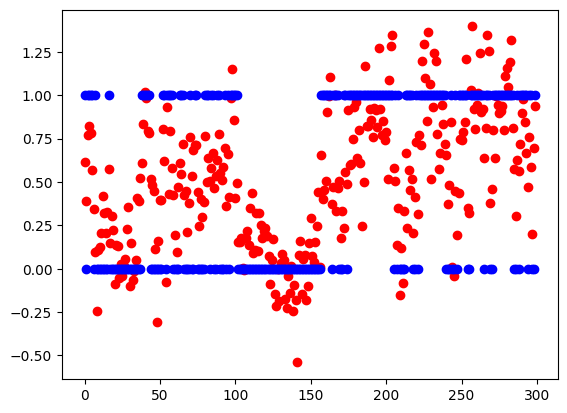

In [36]:
# visualization of the result
plt.plot(np.dot(X_test, b_opt), 'ro', y, 'bo')
plt.show()